In [1]:
import lasio
import welly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from welly import Well
from welly import project

In [3]:
LAS=lasio.read('700021567.las')

In [4]:
well=LAS.df()
well.head()

,TENS,SPA,GR,NPHI,NDSN,FDSN,NRAT,HDRS,HMRS,HDCN,DFL,RHOB,DRHO,PE,QF,QN,DPHI,CALI
DEPT,,,,,,,,,,,,,,,,,,
98.0,1077.9718,NaN,52.2769,NaN,11995.7637,1393.9622,9.1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98.5,1076.9663,NaN,52.4194,NaN,12036.0391,1416.2161,8.9957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.0,1075.9608,NaN,55.1433,NaN,12056.6045,1480.0898,8.6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.5,1074.7878,NaN,56.1569,NaN,12070.4121,1557.4714,8.1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100.0,1073.7822,NaN,56.5053,NaN,12047.2441,1578.5347,8.0718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
well.reset_index(inplace=True)
well.rename(columns={'DEPT':'DEPTH'},inplace=True)
well

,DEPTH,TENS,SPA,GR,NPHI,NDSN,FDSN,NRAT,HDRS,HMRS,HDCN,DFL,RHOB,DRHO,PE,QF,QN,DPHI,CALI
0,98.0,1077.9718,NaN,52.2769,NaN,11995.7637,1393.9622,9.1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.5,1076.9663,NaN,52.4194,NaN,12036.0391,1416.2161,8.9957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99.0,1075.9608,NaN,55.1433,NaN,12056.6045,1480.0898,8.6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99.5,1074.7878,NaN,56.1569,NaN,12070.4121,1557.4714,8.1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,1073.7822,NaN,56.5053,NaN,12047.2441,1578.5347,8.0718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21212,10704.0,4445.1948,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,NaN,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019
21213,10704.5,4404.6401,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,NaN,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019
21214,10705.0,4328.3906,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,NaN,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019
21215,10705.5,4245.1025,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,NaN,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019


The Archie equation is a widely used method in petrophysics to estimate the water saturation (Sw) in subsurface formations. It is based on the concept that the electrical resistivity of a rock is influenced by the presence of fluids within its pore spaces. The Archie equation assumes that the resistivity of a rock is primarily controlled by the resistivity of the pore fluid and the connectivity of the pore spaces.

In [6]:
def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return sw
#Created a function to calculate the water saturation

In [24]:
well['SW'] = sw_archie(well['DPHI'], well['HDRS'], 0.622, 1, 2, 2)
well['SW_LIM'] = well['SW'].mask(well['SW']>1, 1) #masked water saturation greater than 1 as 1


In [8]:
well

,DEPTH,TENS,SPA,GR,NPHI,NDSN,FDSN,NRAT,HDRS,HMRS,...,DFL,RHOB,DRHO,PE,QF,QN,DPHI,CALI,SW,SW_LIM
0,98.0,1077.9718,NaN,52.2769,NaN,11995.7637,1393.9622,9.1039,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.5,1076.9663,NaN,52.4194,NaN,12036.0391,1416.2161,8.9957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99.0,1075.9608,NaN,55.1433,NaN,12056.6045,1480.0898,8.6296,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99.5,1074.7878,NaN,56.1569,NaN,12070.4121,1557.4714,8.1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,1073.7822,NaN,56.5053,NaN,12047.2441,1578.5347,8.0718,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21212,10704.0,4445.1948,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,...,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019,NaN,NaN
21213,10704.5,4404.6401,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,...,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019,NaN,NaN
21214,10705.0,4328.3906,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,...,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019,NaN,NaN
21215,10705.5,4245.1025,201.5781,169.0481,0.0879,27095.5566,11392.5859,2.5131,NaN,NaN,...,NaN,2.4881,0.007,2.3734,-0.0463,-0.1139,0.1142,7.0019,NaN,NaN


In [9]:
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21217 entries, 0 to 21216
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   21217 non-null  float64
 1   TENS    21217 non-null  float64
 2   SPA     19092 non-null  float64
 3   GR      21217 non-null  float64
 4   NPHI    10890 non-null  float64
 5   NDSN    21217 non-null  float64
 6   FDSN    21217 non-null  float64
 7   NRAT    21217 non-null  float64
 8   HDRS    19072 non-null  float64
 9   HMRS    19072 non-null  float64
 10  HDCN    19072 non-null  float64
 11  DFL     19072 non-null  float64
 12  RHOB    10890 non-null  float64
 13  DRHO    10890 non-null  float64
 14  PE      10890 non-null  float64
 15  QF      10890 non-null  float64
 16  QN      10890 non-null  float64
 17  DPHI    10890 non-null  float64
 18  CALI    19092 non-null  float64
 19  SW      10870 non-null  float64
 20  SW_LIM  10870 non-null  float64
dtypes: float64(21)
memory usage: 3.4 MB

In [10]:
well.describe()

,DEPTH,TENS,SPA,GR,NPHI,NDSN,FDSN,NRAT,HDRS,HMRS,...,DFL,RHOB,DRHO,PE,QF,QN,DPHI,CALI,SW,SW_LIM
count,21217.0000000000,21217.0000000000,19092.0000000000,21217.0000000000,10890.0000000000,21217.0000000000,21217.0000000000,21217.0000000000,19072.0000000000,19072.0000000000,...,19072.0000000000,10890.0000000000,10890.0000000000,10890.0000000000,10890.0000000000,10890.0000000000,10890.0000000000,19092.0000000000,10870.0000000000,10870.0000000000
mean,5402.0000000000,3701.6877222133,211.7535839095,100.5280134091,0.2061208999,20167.9356808785,4397.0725170995,6.0465234576,87.9097519190,92.8615030411,...,74.1163270396,2.4568162534,0.1154513774,2.5682180349,0.0026840863,0.0006847475,0.1328479063,10.1280280903,3.8503038164,0.9017329005
std,3062.4823332824,1454.5789793043,28.5021676264,29.5193187586,0.1083583290,3859.7420449790,2576.0082381137,2.2436597701,944.1705491256,1046.7411136252,...,737.8487385079,0.2105715046,0.1044741614,0.6765692202,0.0450581054,0.0682701015,0.1253398726,1.5834431249,24.4357640832,0.2023176748
min,98.0000000000,1069.2574000000,107.7785000000,16.8186000000,0.0276000000,10980.6885000000,960.2623000000,1.8595000000,0.0010000000,1.3971000000,...,0.0010000000,1.2274000000,-1.2147000000,0.0027000000,-0.1706000000,-0.3709000000,-0.1729000000,5.5921000000,0.0064493320,0.0064493320
25%,2750.0000000000,2403.3772000000,201.6369500000,78.5975000000,0.1212000000,17906.1289000000,2475.7214000000,4.2617000000,15.4000750000,13.8531750000,...,12.1896500000,2.4016250000,0.0341250000,2.2955250000,-0.0283000000,-0.0427000000,0.0611000000,8.9750000000,0.9017235172,0.9017235172
50%,5402.0000000000,3753.2495000000,219.4639000000,103.6194000000,0.1856500000,20258.8164000000,3725.3376000000,5.7892000000,21.7389000000,19.8476500000,...,18.1105000000,2.4996500000,0.1170000000,2.5358500000,0.0028000000,0.0009000000,0.1073500000,9.8805500000,1.3566332192,1.0000000000
75%,8054.0000000000,4960.5093000000,228.1187000000,119.2977000000,0.2626000000,22885.7012000000,5702.1641000000,7.6513000000,34.8435250000,34.7411000000,...,36.8272250000,2.5774000000,0.1935000000,2.8054750000,0.0335750000,0.0430000000,0.1657000000,10.9517000000,2.1867875579,1.0000000000
max,10706.0000000000,7009.0308000000,259.0415000000,554.9966000000,0.6968000000,30070.1191000000,29902.5762000000,13.4283000000,20000.0000000000,20000.0000000000,...,20000.0000000000,2.9704000000,0.4373000000,10.0309000000,0.1475000000,0.3185000000,0.8647000000,17.2141000000,1467.2652904350,1.0000000000


In [11]:
# Check for null values
null_counts = well.isnull().sum()
print("Null value counts:")
print(null_counts)

Null value counts:
DEPTH         0
TENS          0
SPA        2125
GR            0
NPHI      10327
NDSN          0
FDSN          0
NRAT          0
HDRS       2145
HMRS       2145
HDCN       2145
DFL        2145
RHOB      10327
DRHO      10327
PE        10327
QF        10327
QN        10327
DPHI      10327
CALI       2125
SW        10347
SW_LIM    10347
dtype: int64


In [12]:
well_distribution=well.drop(['DEPTH','HDRS','HMRS','HDCN','DFL','SW'],axis=1)



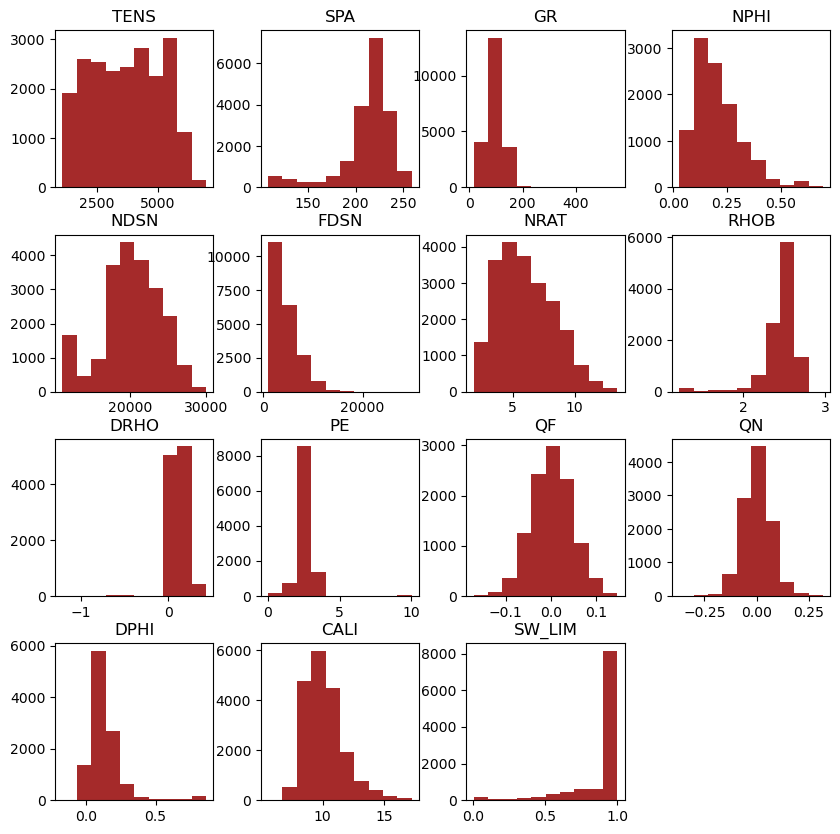

In [13]:
well_distribution.hist(figsize=(10,10),grid=False,color='Brown');

The presence of missing values, particularly in the initial depths and certain logs, is a common occurrence in well log data, especially during the drilling phase. There are several reasons why missing values can occur:

Logging Tool Limitations: Different logging tools have different capabilities, and certain logs may not be available or recorded for specific depths or intervals. For example, some logging tools may not provide accurate measurements in highly deviated or horizontal well sections.

Operational Issues: During the drilling phase, various operational issues can lead to missing log data. These include tool failures, data transmission problems, poor tool positioning, or inadequate wellbore conditions that hinder data acquisition.

Formation Properties: Formation heterogeneity and variations in lithology can affect the response of logging tools, resulting in missing or unreliable log data. Certain formations, such as highly fractured or unstable formations, can pose challenges for logging tools, leading to missing values.

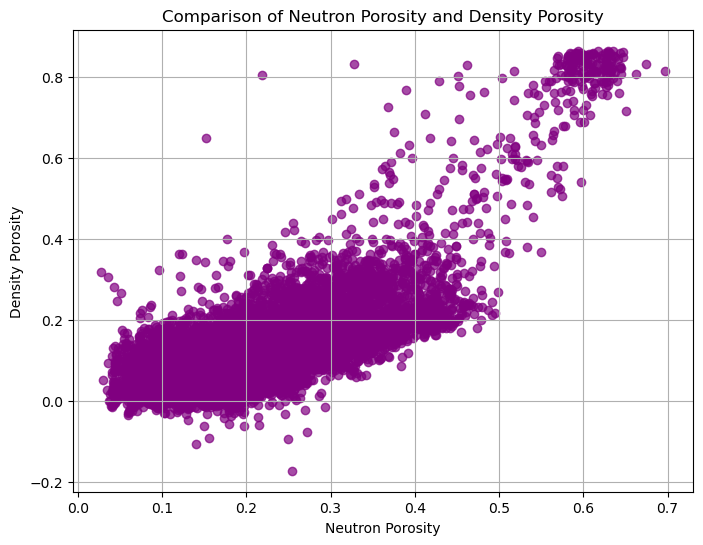

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(well['NPHI'], well['DPHI'], color='purple', alpha=0.7)
plt.xlabel('Neutron Porosity')
plt.ylabel('Density Porosity')
plt.title('Comparison of Neutron Porosity and Density Porosity')
plt.grid(True)
plt.show()

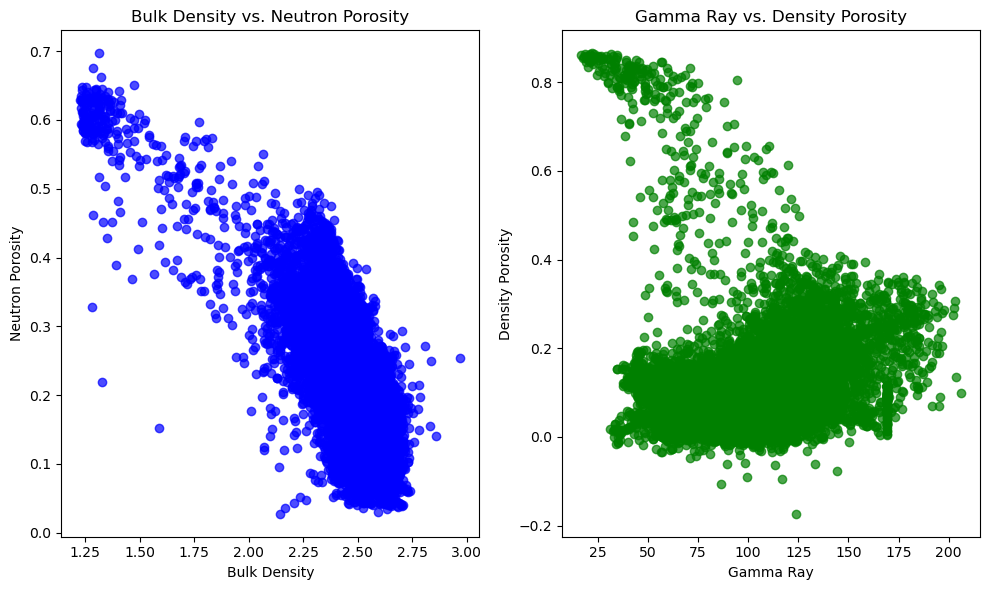

In [15]:
plt.figure(figsize=(10, 6))

# Bulk Density vs. Neutron Porosity
plt.subplot(1, 2, 1)
plt.scatter(well['RHOB'], well['NPHI'], color='blue', alpha=0.7)
plt.xlabel('Bulk Density')
plt.ylabel('Neutron Porosity')
plt.title('Bulk Density vs. Neutron Porosity')

# Bulk Density vs. Density Porosity
plt.subplot(1, 2, 2)
plt.scatter(well['GR'], well['DPHI'], color='green', alpha=0.7)
plt.xlabel('Gamma Ray')
plt.ylabel('Density Porosity')
plt.title('Gamma Ray vs. Density Porosity')

plt.tight_layout()
plt.show()

In [16]:
import seaborn as sns
log_cols=['RHOB', 'GR', 'DPHI', 'NPHI']

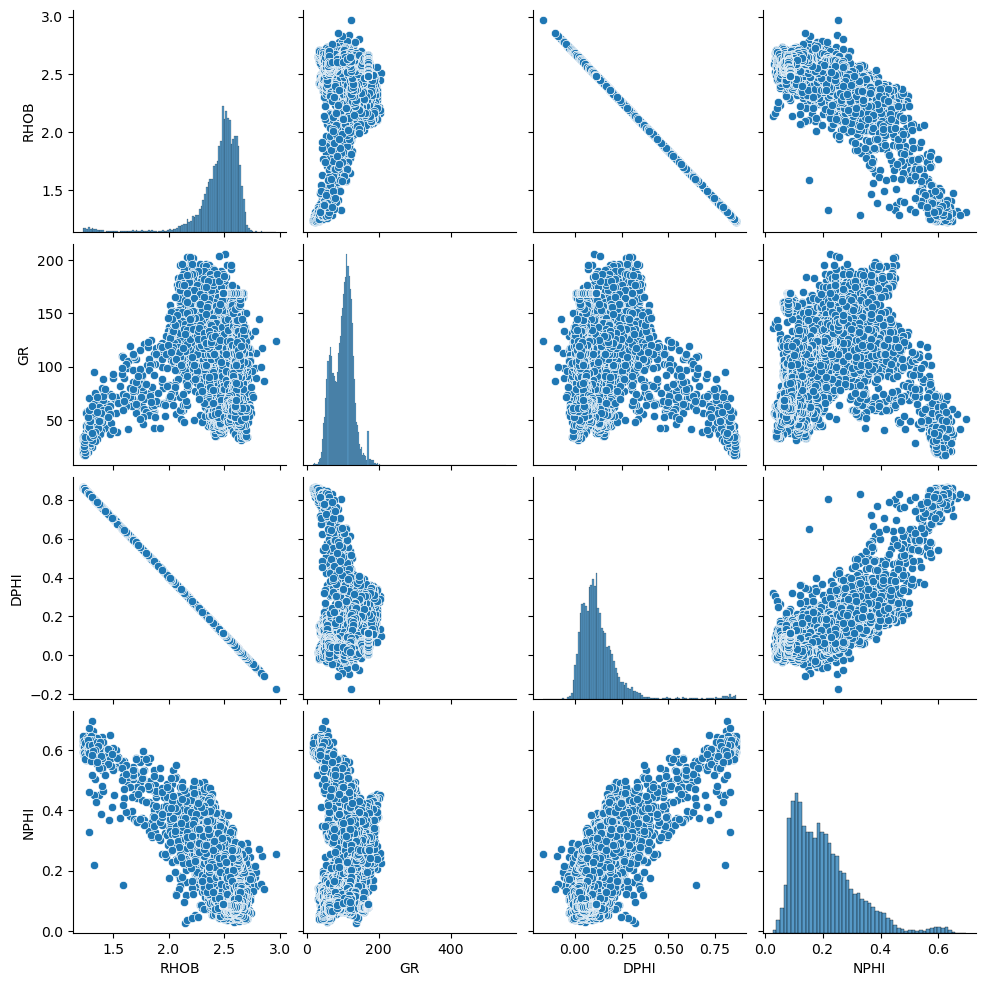

In [17]:
sns.pairplot(data=well[log_cols])


## WELL_LOG_TRACKS USING MATPLOTLIB

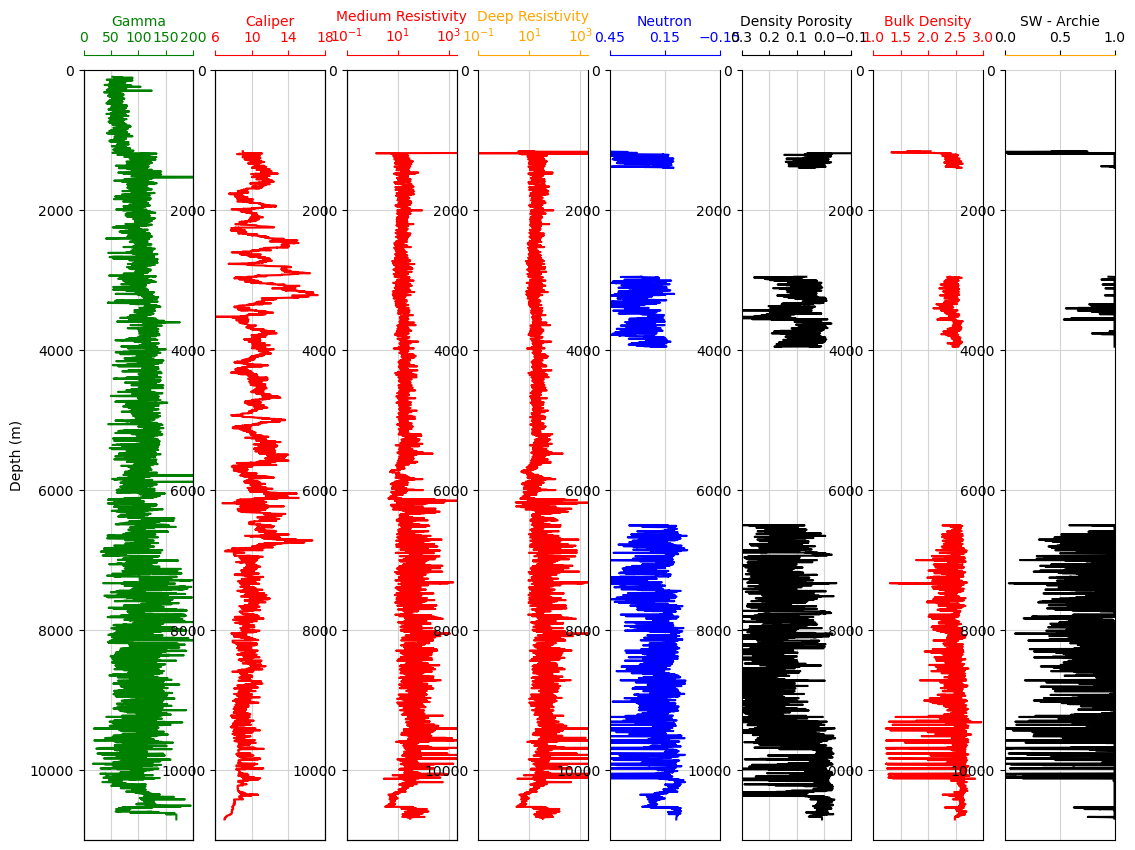

In [26]:

fig, ax = plt.subplots(figsize=(15,10)) ## Sets up the figure space

ax1 = plt.subplot2grid((1,9), (0,0), rowspan=1, colspan = 1) # The first tuple defines that you want 1 row and 7 columns, and the second tuple defines the position of the particular plot (axes)
ax2 = plt.subplot2grid((1,9), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,9), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,9), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,9), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,9), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,9), (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,9), (0,7), rowspan=1, colspan = 1)


ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)

ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

ax2.plot("CALI", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Caliper")
ax2.set_xlim(6, 18)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([6,10,14,18])


ax3.plot("HMRS", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Medium Resistivity")
ax3.set_xlim(0.2, 2000)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.1, 1, 10, 100, 1000])
ax3.semilogx()


ax4.plot("HDRS", "DEPTH", data = well, color = "red")
ax4.set_xlabel("Deep Resistivity")
ax4.set_xlim(0.2, 2000)
ax4.xaxis.label.set_color("orange")
ax4.tick_params(axis='x', colors="orange")
ax4.spines["top"].set_edgecolor("orange")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()


ax5.plot("NPHI", "DEPTH", data = well, color = "blue")
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.3,-0.1)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

ax6.plot("DRHO", "DEPTH", data = well, color = "black")
ax6.set_xlabel("Density Porosity")
ax6.set_xlim(0.3, -0.1)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([0.3,0.2,0.1,0,-0.1])


ax7.plot("RHOB", "DEPTH", data = well, color = "red")
ax7.set_xlabel("Bulk Density")
ax7.set_xlim(1, 3)
ax7.xaxis.label.set_color("red")
ax7.tick_params(axis='x', colors="red")
ax7.spines["top"].set_edgecolor("red")
ax7.set_xticks([1,1.5,2,2.5,3])

ax8.plot("SW_LIM", "DEPTH", data = well, color = "black")
ax8.set_xlabel("SW - Archie")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("orange")
ax8.set_xticks([0, 0.5, 1])



for ax in [ax1, ax2, ax3, ax4,ax5, ax6, ax7,ax8, ax9]:
    ax.set_ylim(11000,0)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    